In [9]:
import numpy as np
import scipy.spatial
import scipy.ndimage
from PIL import Image

In [3]:
x = np.arange(3)
points = tuple(zip(x, x))

In [11]:
tree = scipy.spatial.KDTree(points, leafsize=2048)
tree.data

array([[0, 0],
       [1, 1],
       [2, 2]])

In [21]:
dists, indices = tree.query(points, k=3)

In [22]:
indices[1].shape

(3,)

In [24]:
dists

array([[0.        , 1.41421356, 2.82842712],
       [0.        , 1.41421356, 1.41421356],
       [0.        , 1.41421356, 2.82842712]])

In [7]:
dummy_density_map = np.zeros((5, 5))
dummy_density_map[:, 2] = 1

In [8]:
gaussian = scipy.ndimage.gaussian_filter(dummy_density_map, sigma=1)

In [7]:
import matplotlib.pyplot as plt

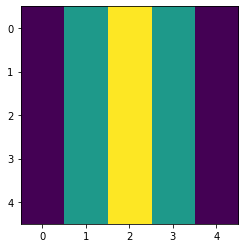

In [10]:
plt.imshow(gaussian)

In [6]:
import sys
import os

In [5]:
sys.path.append('..')

In [13]:
from density_map.k_nearest_gaussian_kernel import density_map_generator

In [14]:
dm = density_map_generator((240, 352), [(120, 150), (125, 135), (132, 119), (142, 104)])

In [6]:
from datasets.CityCam_maker import parse_xml

In [8]:
img_shape, points = parse_xml('../CityCam/928/928-20160502-18/000271.xml')

In [10]:
for ind, p in enumerate(points):
    print(ind)
    print(f'y = {p[0]}, x = {p[1]}')
    assert p[0] >= 0 and p[0] < img_shape[0]
    assert p[1] >= 0 and p[1] < img_shape[1]

0
y = 77, x = 210
1
y = 120, x = 131
2
y = 154, x = 127
3
y = 109, x = 238
4
y = 83, x = 213
5
y = 108, x = 134
6
y = 137, x = 130
7
y = 66, x = 164
8
y = 73, x = 134
9
y = 80, x = 140
10
y = 66, x = 175
11
y = 75, x = 167
12
y = 89, x = 168
13
y = 82, x = 182
14
y = 63, x = 184
15
y = 166, x = 182
16
y = 78, x = 193
17
y = 89, x = 197
18
y = 100, x = 208
19
y = 131, x = 225
20
y = 152, x = 209
21
y = 222, x = 281
22
y = 240, x = 248


AssertionError: 

In [25]:
dm = np.load('../CityCam/551/551-20160429-15/000029_dm.npy')

In [24]:
img = Image.open(('../CityCam/551/551-20160429-15/000029.jpg'))

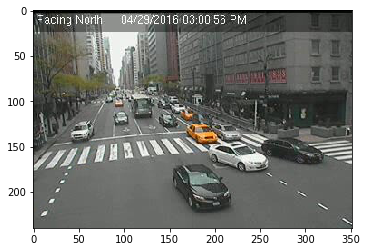

In [26]:
plt.imshow(img)

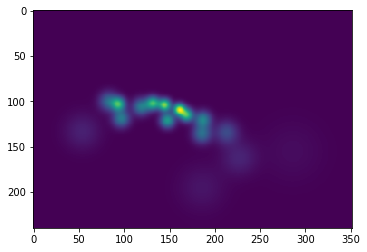

In [27]:
plt.imshow(dm)